In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
x_train = pd.read_csv('../data/train.csv', index_col=False)
x_test = pd.read_csv('../data/test.csv', index_col=False)

In [3]:
y_train = x_train.pop('label')
y_test = x_test.pop('label')

In [4]:
x_train.head()

,state_others,ct_state_ttl,service_ftp-data,service_dns,dinpkt,sloss,swin,dload,smean,ct_srv_src,...,state_REQ,proto_tcp,sbytes,state_INT,tcprtt,service_ftp,sinpkt,spkts,ct_dst_src_ltm,service_ssh
0,0,0.591021,0,0,-0.094169,-0.073531,-1.04792,-0.263498,0.520319,-0.680474,...,0,0,-0.043684,1,-0.482025,0,-0.122179,-0.124455,-0.477994,0
1,0,0.591021,0,0,-0.094169,-0.073531,-1.04792,-0.263498,3.556716,-0.680474,...,0,0,-0.036308,1,-0.482025,0,-0.122180,-0.124455,-0.477994,0
2,0,0.591021,0,0,-0.094169,-0.073531,-1.04792,-0.263498,1.892214,-0.590304,...,0,0,-0.040351,1,-0.482025,0,-0.122180,-0.124455,-0.390391,0
3,0,0.591021,0,0,-0.094169,-0.073531,-1.04792,-0.263498,1.489280,-0.590304,...,0,0,-0.041330,1,-0.482025,0,-0.122180,-0.124455,-0.390391,0
4,0,0.591021,0,0,-0.094169,-0.073531,-1.04792,-0.263498,4.429740,-0.590304,...,0,0,-0.034187,1,-0.482025,0,-0.122179,-0.124455,-0.390391,0


# Modeling

- eXtream Gradient Boosting Random Forest
- Random Forest
- Categorical Boosting

- To do:

    - Gradient Descent
    - Voting
    - cv
    - Evaluations
    - Classification Report

## <center>eXtream Gradient Boosting</center>
<center>Accuracy: 0.94120</center>

In [5]:
xgb = XGBRFClassifier(random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:03:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9412014769469951

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


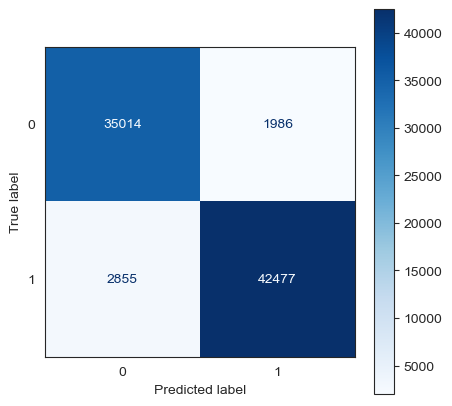

In [6]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(xgb, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## <center>Random Forest</center>
<center>Accuracy: 0.99990</center>

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.9999028324345334

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


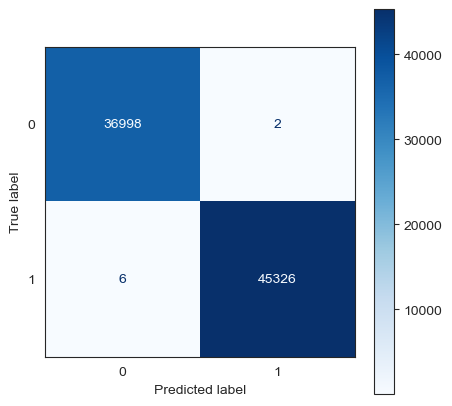

In [8]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(rf, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## <center>Categorical Boosting</center>
<center>Accuracy: </center>

In [9]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(random_state=42)
cat.fit(x_train, y_train)
y_pred = cat.predict(x_test)
accuracy_score(y_test, y_pred)

Learning rate set to 0.067746
0:	learn: 0.5619310	total: 156ms	remaining: 2m 35s
1:	learn: 0.4677234	total: 179ms	remaining: 1m 29s
2:	learn: 0.4071310	total: 201ms	remaining: 1m 6s
3:	learn: 0.3594429	total: 226ms	remaining: 56.2s
4:	learn: 0.3200316	total: 253ms	remaining: 50.3s
5:	learn: 0.2911761	total: 281ms	remaining: 46.6s
6:	learn: 0.2679681	total: 307ms	remaining: 43.5s
7:	learn: 0.2525980	total: 329ms	remaining: 40.8s
8:	learn: 0.2369015	total: 349ms	remaining: 38.4s
9:	learn: 0.2246790	total: 368ms	remaining: 36.4s
10:	learn: 0.2145965	total: 386ms	remaining: 34.7s
11:	learn: 0.2077005	total: 405ms	remaining: 33.4s
12:	learn: 0.2002730	total: 429ms	remaining: 32.6s
13:	learn: 0.1943680	total: 453ms	remaining: 31.9s
14:	learn: 0.1896635	total: 481ms	remaining: 31.6s
15:	learn: 0.1835661	total: 508ms	remaining: 31.2s
16:	learn: 0.1786140	total: 527ms	remaining: 30.5s
17:	learn: 0.1735945	total: 549ms	remaining: 29.9s
18:	learn: 0.1682322	total: 569ms	remaining: 29.4s
19:	learn

0.9878176164796191

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


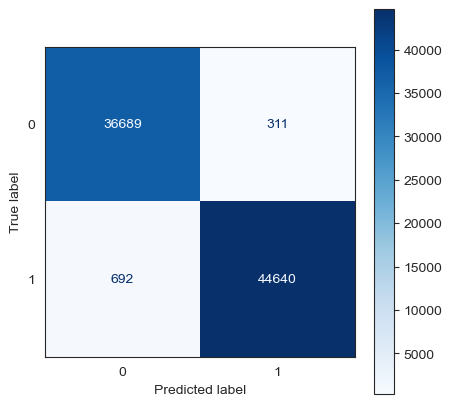

In [10]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(cat, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()